In [ ]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [ ]:
iv3 = InceptionV3()
#print(iv3.summary())

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
from keras.preprocessing import image

x = image.img_to_array(image.load_img("./car.jpg", target_size=(299,299)))

# Cambiamos el rango de los valores de 0-255 a -1-1
x /= 255
x -= 0.5
x *= 2

x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])

y = iv3.predict(x)

In [ ]:
decode_predictions(y)

[[('n04037443', 'racer', 0.22893062),
  ('n07749582', 'lemon', 0.15451638),
  ('n04285008', 'sports_car', 0.11009365),
  ('n02974003', 'car_wheel', 0.043506395),
  ('n07747607', 'orange', 0.039344657)]]

In [ ]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951 # Clase de un limon en la red neuronal
loss = out_layer[0, target_class] # Nuestra función de coste que vamos maximizar sera nuestro target_class

grad = K.gradients(loss, inp_layer)[0] # Proceso para calcular el gradiente entre el error y la variable de entrada
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

adv = np.copy(x) # Creamos una instancia de la imagen original

# Creamos un limite de perturbación para que los pixeles de la imagen no se vean manipulados
pert = 0.01
max_pert = x + 0.01
min_pert = x - 0.01

cost = 0.0
while cost < 0.95:
  gr, cost = optimize_gradient([adv, 0])
  adv += gr
  adv = np.clip(adv, min_pert, max_pert) # Limitamos la perturbación de la imagen
  adv = np.clip(adv, -1, 1) # Limitamos la intenidad de -1 a 1

  print("Target cost: ", cost)

hacked = np.copy(adv)

Target cost:  8.2037826e-05
Target cost:  8.215368e-05
Target cost:  8.22702e-05
Target cost:  8.238638e-05
Target cost:  8.250308e-05
Target cost:  8.2620034e-05
Target cost:  8.273708e-05
Target cost:  8.285367e-05
Target cost:  8.297145e-05
Target cost:  8.308882e-05
Target cost:  8.320605e-05
Target cost:  8.332268e-05
Target cost:  8.343967e-05
Target cost:  8.355632e-05
Target cost:  8.367338e-05
Target cost:  8.379095e-05
Target cost:  8.390916e-05
Target cost:  8.402765e-05
Target cost:  8.4146166e-05
Target cost:  8.426545e-05
Target cost:  8.4384774e-05
Target cost:  8.45042e-05
Target cost:  8.462262e-05
Target cost:  8.4740546e-05
Target cost:  8.485899e-05
Target cost:  8.497757e-05
Target cost:  8.509609e-05
Target cost:  8.521536e-05
Target cost:  8.5334745e-05
Target cost:  8.545348e-05
Target cost:  8.557208e-05
Target cost:  8.569113e-05
Target cost:  8.5810236e-05
Target cost:  8.5929394e-05
Target cost:  8.6049e-05
Target cost:  8.616917e-05
Target cost:  8.628993e-

In [ ]:
# Volvemos al rango de valores que teniamos antes en la imagen
adv /= 2
adv += 0.5
adv *= 255

<function matplotlib.pyplot.show>

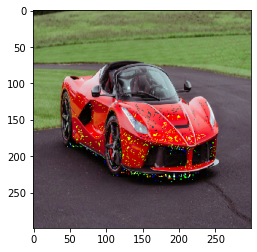

In [ ]:
plt.imshow(adv[0].astype(np.uint8)) # convertimos de entero a flotante
plt.show # mostramos la imagen

In [ ]:
# Guardamos la imagen manipulada
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("./hacked.png")